## Q1

In [1]:
# Do NOT modify this block of code

import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt

In [2]:
# Do NOT modify this block of code
n = 200

rand_x = np.random.RandomState(0)
x = rand_x.randint(1, 100, (n, 1))

rand_noise = np.random.RandomState(10)
y = 2.13 * x - 50.84 + 10*rand_noise.randn(n, 1)

In [15]:
def fit_regression_line(x: npt.NDArray[np.float64], y: npt.NDArray[np.float64]) -> npt.NDArray[np.float64]:

    ## Your code starts here ##

    #finding the mean for x and y
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    beta_1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)

    beta_0 = y_mean - beta_1 * x_mean

    ## end ##

    return np.array([beta_0, beta_1])

In [16]:
# Do NOT modify this block of code.
# If this code cell run without any 'AssertionError', then your function 'fit_regression_line' is returning a numpy array with the correct shape.
assert fit_regression_line(x, y).shape == (2, )

In [17]:
# Do NOT modify this block of code
def rmse(x: npt.NDArray[np.float64], y: npt.NDArray[np.float64]) -> np.float64:
    beta_0, beta_1 = fit_regression_line(x, y)

    y_hat = beta_1 * x + beta_0

    return np.sqrt(np.mean((y - y_hat)**2))

print(f"RMSE score is: {np.round(rmse(x, y), 4)}")

RMSE score is: 9.7621


In [18]:
# Do NOT modify this block of code
def r_squared(x: npt.NDArray[np.float64], y: npt.NDArray[np.float64]) -> np.float64:
    beta_0, beta_1 = fit_regression_line(x, y)

    y_hat = beta_1 * x + beta_0

    return (np.corrcoef(y_hat, y, rowvar=False)[0, 1])**2

print(f"R-Squared score is: {np.round(r_squared(x, y), 4)}")

R-Squared score is: 0.9737


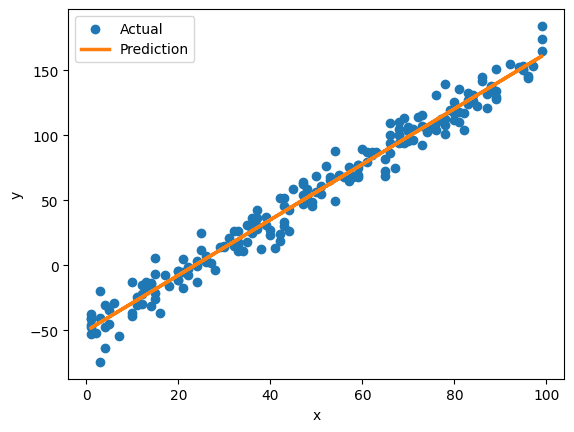

In [19]:
# Do NOT modify this block of code
def plot_predictions(x: npt.NDArray[np.float64], y: npt.NDArray[np.float64]) -> None:
    beta_0, beta_1 = fit_regression_line(x, y)

    y_hat = beta_1 * x + beta_0

    plt.scatter(x.flatten(), y.flatten(), color=plt.cm.tab10(0), label='Actual')
    plt.plot(x.flatten(), y_hat.flatten(), color=plt.cm.tab10(1), linewidth=2.5, label='Prediction')

    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")

    plt.show()

plot_predictions(x, y)

In [20]:
# Do NOT modify this block of code

import pandas as pd

## Q2(a)

In [21]:
# Do NOT modify this block of code

import seaborn as sns

iris_df = sns.load_dataset('iris')
print(iris_df.shape)
iris_df.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
## Your code starts here ##

#selecting the numeric column of data type float
numeric_columns = iris_df.select_dtypes(include=[float]).columns

#to iterate over the columns
for col in numeric_columns:

  #calculating the mean
  col_mean = iris_df[col].mean()

  #calculating the standard deviation
  col_sd = iris_df[col].std()

  #calculating the z_score
  iris_df[col + '_z'] = (iris_df[col] - col_mean) / col_sd

## end ##

## Q2(b)

In [23]:
## Your code starts here ##

#creating a list of all columns with z-scores, that have the string '_z'
z_score_col = [col for col in iris_df.columns if '_z' in col]

#calculating the mean of the z-scores, row-wise as shown using "axis=1"
iris_df['mean_z_score'] = iris_df[z_score_col].mean(axis=1)

## end ##

## Q2(c)

In [24]:
## Your code starts here ##

###lambda: create small anonymous fn @runtime
#grouping the df using the species col
#finding abs then finding the max val of it
#sorting the data in the col in descending order (ascending=False)
max_abs_mean_z_score = iris_df.groupby('species')['mean_z_score'].apply(lambda x: x.abs().max()).sort_values(ascending=False)

## end ##